## Analyzing covid data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading data

In [2]:
d=pd.read_csv('covid.csv')

## Display data

In [3]:
d

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
18322,18323,04/24/2020,Wyoming,US,25-04-2020 06:31,473,7,0
18323,18324,04/24/2020,Xinjiang,Mainland China,25-04-2020 06:31,76,3,73
18324,18325,04/24/2020,Yukon,Canada,25-04-2020 06:31,11,0,0
18325,18326,04/24/2020,Yunnan,Mainland China,25-04-2020 06:31,185,2,180


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              18327 non-null  int64 
 1   ObservationDate  18327 non-null  object
 2   Province/State   9050 non-null   object
 3   Country/Region   18327 non-null  object
 4   Last Update      18327 non-null  object
 5   Confirmed        18327 non-null  int64 
 6   Deaths           18327 non-null  int64 
 7   Recovered        18327 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.1+ MB


## Sample data

In [5]:
d.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
6700,6701,03/18/2020,NaN,Montenegro,2020-03-18T19:53:03,1,0,0
5458,5459,03/14/2020,NaN,San Marino,2020-03-14T22:53:02,80,5,4
5617,5618,03/14/2020,NaN,Mauritania,2020-03-14T12:53:07,1,0,0
658,659,02-03-2020,NaN,Singapore,2020-02-02T01:03:32,18,0,0
11668,11669,04-04-2020,NaN,Finland,04-04-2020 09:38,1882,25,300


## Data cleaning

In [6]:
d=pd.read_csv('covid.csv',index_col=0)

In [7]:
d

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,25-04-2020 06:31,473,7,0
18324,04/24/2020,Xinjiang,Mainland China,25-04-2020 06:31,76,3,73
18325,04/24/2020,Yukon,Canada,25-04-2020 06:31,11,0,0


## To check how many rows and columns

In [8]:
d.shape

(18327, 7)

## To print field's name

In [9]:
d.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

## Description of the data

In [10]:
d.describe()

,Confirmed,Deaths,Recovered
count,18327.000000,18327.000000,18327.000000
mean,3030.015551,180.680417,764.542424
std,15129.079515,1362.099905,5618.658958
min,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,101.000000,1.000000,2.000000
75%,674.500000,8.000000,71.000000
max,271590.000000,25969.000000,109800.000000


In [11]:
d.describe(include='all')

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
count,18327,9050,18327,18327,18327.000000,18327.000000,18327.000000
unique,94,297,220,1835,NaN,NaN,NaN
top,04-10-2020,Diamond Princess cruise ship,US,03-08-2020 05:31,NaN,NaN,NaN
freq,321,125,3540,1232,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3030.015551,180.680417,764.542424
std,NaN,NaN,NaN,NaN,15129.079515,1362.099905,5618.658958
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,9.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,101.000000,1.000000,2.000000
75%,NaN,NaN,NaN,NaN,674.500000,8.000000,71.000000


In [12]:
d.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.899834,0.660188
Deaths,0.899834,1.000000,0.564944
Recovered,0.660188,0.564944,1.000000


## Checking for Null values

In [13]:
d.isna()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
18323,False,False,False,False,False,False,False
18324,False,False,False,False,False,False,False
18325,False,False,False,False,False,False,False


In [14]:
d.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [15]:
d.isnull().sum().sum()

9277

In [16]:
d.drop('Province/State',axis=1,inplace=True)

In [17]:
d

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Mainland China,1/22/2020 17:00,6,0,0
4,01/22/2020,Mainland China,1/22/2020 17:00,1,0,0
5,01/22/2020,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...
18323,04/24/2020,US,25-04-2020 06:31,473,7,0
18324,04/24/2020,Mainland China,25-04-2020 06:31,76,3,73
18325,04/24/2020,Canada,25-04-2020 06:31,11,0,0


## Rename the Country/Region 

In [18]:
d.rename(columns={'Country/Region':'Country'},inplace=True)

In [19]:
d

,ObservationDate,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Mainland China,1/22/2020 17:00,6,0,0
4,01/22/2020,Mainland China,1/22/2020 17:00,1,0,0
5,01/22/2020,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...
18323,04/24/2020,US,25-04-2020 06:31,473,7,0
18324,04/24/2020,Mainland China,25-04-2020 06:31,76,3,73
18325,04/24/2020,Canada,25-04-2020 06:31,11,0,0


In [20]:
d.duplicated()

SNo
1        False
2        False
3        False
4         True
5        False
         ...  
18323    False
18324    False
18325    False
18326    False
18327    False
Length: 18327, dtype: bool

In [21]:
d.duplicated().sum()

347

In [22]:
d=d.drop_duplicates()

In [23]:
d

,ObservationDate,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Mainland China,1/22/2020 17:00,6,0,0
5,01/22/2020,Mainland China,1/22/2020 17:00,0,0,0
6,01/22/2020,Mainland China,1/22/2020 17:00,26,0,0
...,...,...,...,...,...,...
18323,04/24/2020,US,25-04-2020 06:31,473,7,0
18324,04/24/2020,Mainland China,25-04-2020 06:31,76,3,73
18325,04/24/2020,Canada,25-04-2020 06:31,11,0,0


In [24]:
d.duplicated().sum()

0

In [25]:
d.sort_values(by='ObservationDate',ascending=False)

,ObservationDate,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
18327,04/24/2020,Mainland China,25-04-2020 06:31,1268,1,1256
18168,04/24/2020,Syria,25-04-2020 06:31,42,3,6
18110,04/24/2020,Malaysia,25-04-2020 06:31,5691,96,3663
18111,04/24/2020,Maldives,25-04-2020 06:31,129,0,16
18112,04/24/2020,Mali,25-04-2020 06:31,325,21,87
...,...,...,...,...,...,...
35,01/22/2020,Mainland China,1/22/2020 17:00,10,0,0
36,01/22/2020,Japan,1/22/2020 17:00,2,0,0
37,01/22/2020,Thailand,1/22/2020 17:00,2,0,0


## Counting the number of countries 

In [26]:
d['Country'].value_counts()

US                     3311
Mainland China         2856
Canada                  721
Australia               566
France                  463
                       ... 
 Azerbaijan               1
North Ireland             1
Republic of Ireland       1
East Timor                1
Cape Verde                1
Name: Country, Length: 220, dtype: int64

## Country with maximum/minimum entries

In [27]:
d['Country'].value_counts().max()

3311

In [28]:
d['Country'].value_counts().min()

1

In [29]:
d['Deaths'].value_counts().max()

7754

In [30]:
d['Country'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

## Creating a copy of data

In [31]:
d1=d.copy()

In [32]:
d1

,ObservationDate,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Mainland China,1/22/2020 17:00,6,0,0
5,01/22/2020,Mainland China,1/22/2020 17:00,0,0,0
6,01/22/2020,Mainland China,1/22/2020 17:00,26,0,0
...,...,...,...,...,...,...
18323,04/24/2020,US,25-04-2020 06:31,473,7,0
18324,04/24/2020,Mainland China,25-04-2020 06:31,76,3,73
18325,04/24/2020,Canada,25-04-2020 06:31,11,0,0


In [33]:
n=d.groupby('Country').Deaths.sum().sort_values(ascending=False)
n

Country
US                                631502
Italy                             597687
Spain                             460470
France                            367150
UK                                270200
                                   ...  
Macau                                  0
Laos                                   0
('St. Martin',)                        0
Jersey                                 0
occupied Palestinian territory         0
Name: Deaths, Length: 220, dtype: int64

In [34]:
n=d.groupby('Country').Confirmed.sum().sort_values(ascending=False)
n

Country
US                       14591043
Mainland China            6148236
Italy                     4936614
Spain                     4735954
Germany                   3574181
                           ...   
Cape Verde                      1
North Ireland                   1
The Gambia                      1
Republic of the Congo           1
 Azerbaijan                     1
Name: Confirmed, Length: 220, dtype: int64

In [35]:
n=d.groupby('Country').Deaths.sum().sort_values(ascending=False)
n

Country
US                                631502
Italy                             597687
Spain                             460470
France                            367150
UK                                270200
                                   ...  
Macau                                  0
Laos                                   0
('St. Martin',)                        0
Jersey                                 0
occupied Palestinian territory         0
Name: Deaths, Length: 220, dtype: int64

In [52]:
d['ObservationDate'] = pd.to_datetime(d['ObservationDate'])

## Grouping Cases as per the Date

In [54]:
date_wise = d.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
date_wise.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,529,17,28
2020-01-23,601,18,30
2020-01-24,880,26,36
2020-01-25,1408,42,39
2020-01-26,2043,56,52


## Total Number of Confirmed Cases around the World

In [55]:
date_wise['Confirmed'].iloc[-1]

2811193

## Total Number of Recoverd Cases around the World

In [38]:
date_wise['Recovered'].iloc[-1]

793601

## Total Number of Deaths Cases around the World

In [39]:
date_wise['Deaths'].iloc[-1]

197159

## Total Number of Active Cases

In [40]:
date_wise['Confirmed'].iloc[-1]-date_wise['Recovered'].iloc[-1]-date_wise['Deaths'].iloc[-1]

1820433

## Total Number of Closed Cases

In [41]:
date_wise['Deaths'].iloc[-1]+date_wise['Recovered'].iloc[-1]

990760

## Data visualization

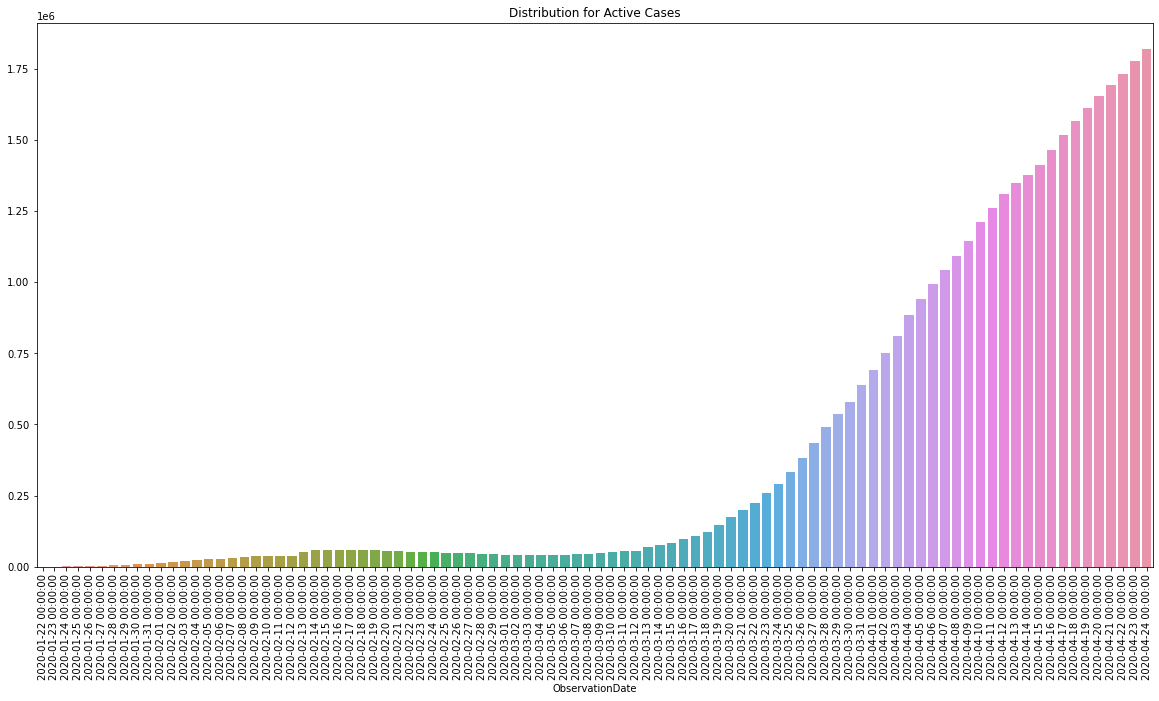

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x=date_wise.index,y=date_wise['Confirmed']-date_wise['Recovered']-date_wise['Deaths'])
plt.xticks(rotation=90)
plt.title('Distribution for Active Cases')
plt.show()

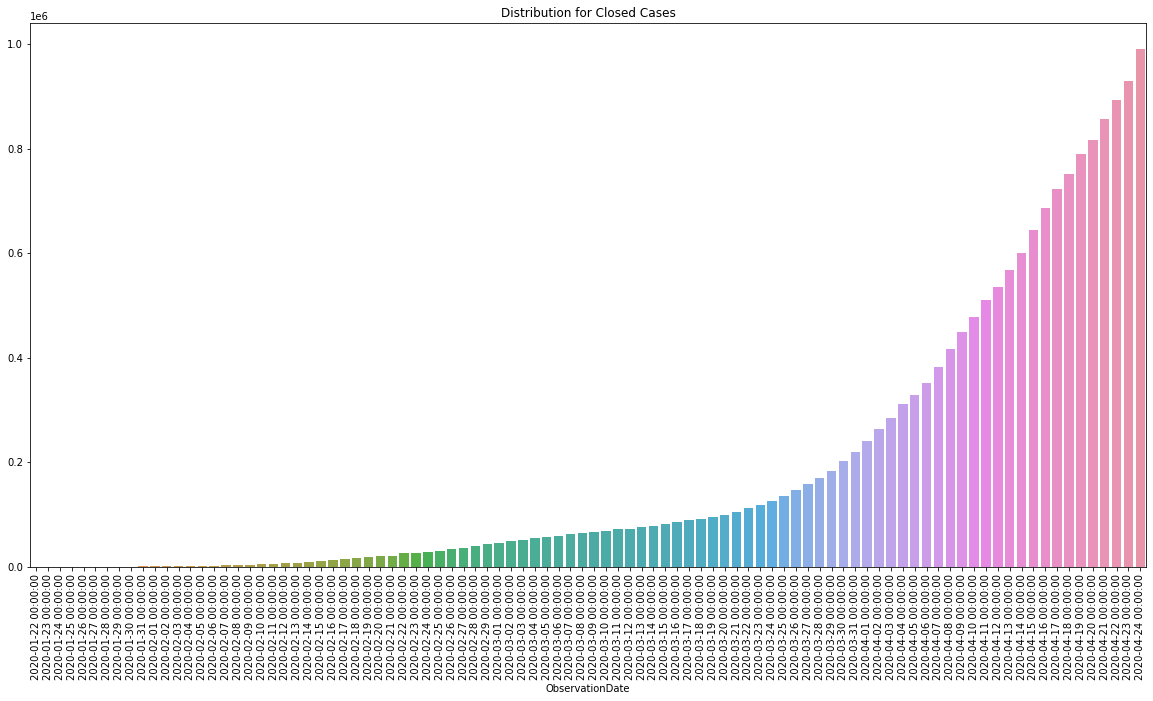

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x=date_wise.index,y=date_wise['Recovered']+date_wise['Deaths'])
plt.xticks(rotation=90)
plt.title('Distribution for Closed Cases')
plt.show()

In [61]:
date_wise['week']=date_wise.index.weekofyear
date_wise

,Confirmed,Deaths,Recovered,week
ObservationDate,,,,
2020-01-22,529,17,28,4
2020-01-23,601,18,30,4
2020-01-24,880,26,36,4
2020-01-25,1408,42,39,4
2020-01-26,2043,56,52,4
...,...,...,...,...
2020-04-20,2472259,169986,645738,17
2020-04-21,2549123,176583,679819,17
2020-04-22,2623960,183066,709694,17


In [62]:
week_num=[]
week_confirmed=[]
week_deaths=[]
week_recovered=[]
w = 1
for i in list(date_wise['week'].unique()):
    week_confirmed.append(date_wise[date_wise['week']==i]['Deaths'].iloc[-1])
    week_deaths.append(date_wise[date_wise['week']==i]['Confirmed'].iloc[-1])
    week_recovered.append(date_wise[date_wise['week']==i]['Recovered'].iloc[-1])
    week_num.append(w)
    w = w + 1
   

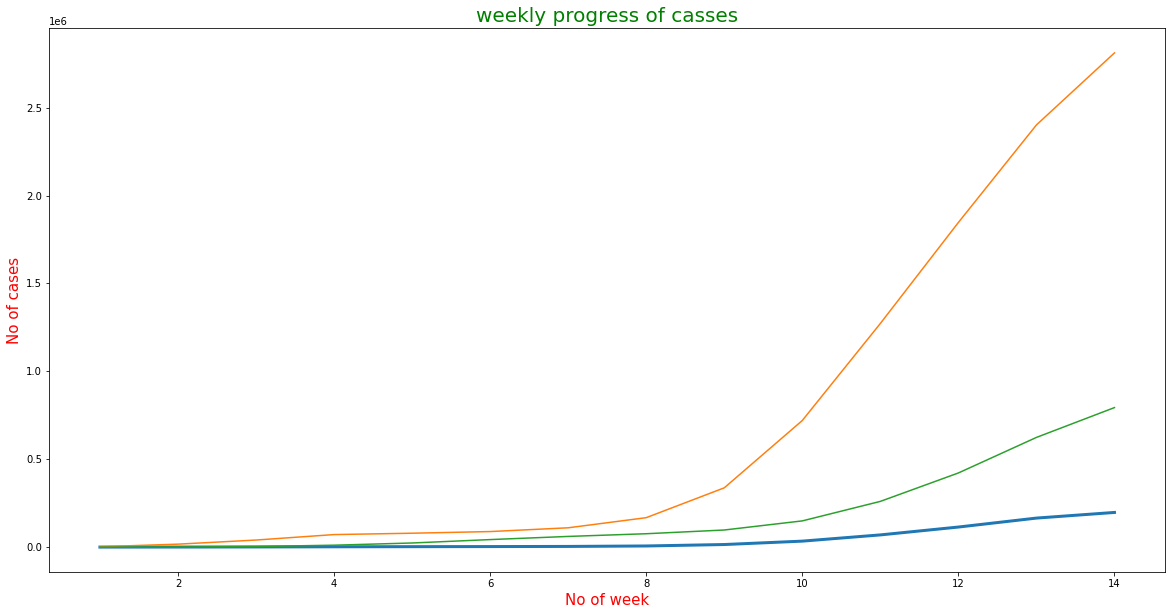

In [65]:
plt.figure(figsize=(20,10))
plt.plot(week_num,week_confirmed,linewidth=3)
plt.plot(week_num,week_deaths)
plt.plot(week_num,week_recovered)
plt.xlabel('No of week',fontsize=15,color='red')
plt.ylabel('No of cases',fontsize=15,color='red')
plt.title('weekly progress of casses',fontsize=20,color='green')
plt.show()

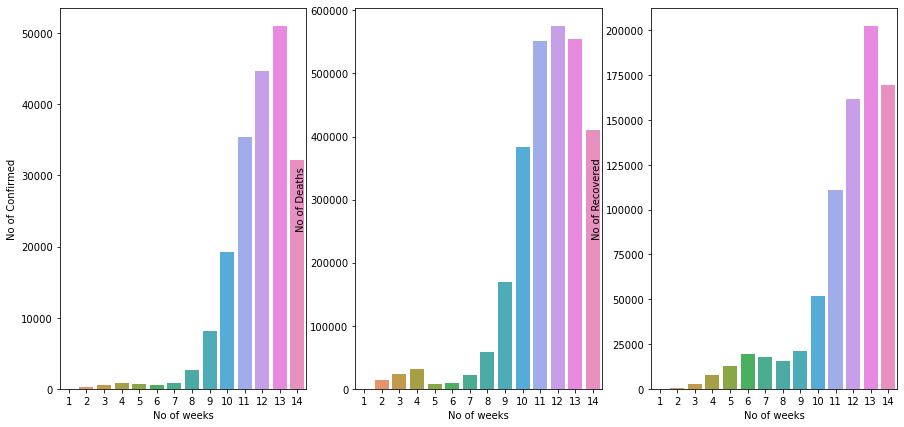

In [66]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,7))
sns.barplot(x=week_num,y=pd.Series(week_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(week_deaths).diff().fillna(0),ax=ax2)
sns.barplot(x=week_num,y=pd.Series(week_recovered).diff().fillna(0),ax=ax3)
ax1.set_xlabel('No of weeks')
ax2.set_xlabel('No of weeks')
ax3.set_xlabel('No of weeks')
ax1.set_ylabel('No of Confirmed')
ax2.set_ylabel('No of Deaths')
ax3.set_ylabel('No of Recovered')
plt.show()

In [67]:
np.round(date_wise['Confirmed'].diff().fillna(0).mean())

29901.0

In [68]:
np.round(date_wise['Deaths'].diff().fillna(0).mean())

2097.0

In [69]:
np.round(date_wise['Recovered'].diff().fillna(0).mean())

8442.0

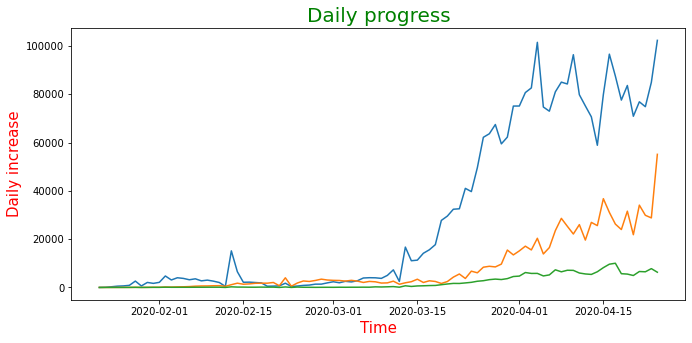

In [70]:
plt.figure(figsize=(11,5))
plt.plot(date_wise['Confirmed'].diff().fillna(0),label='Daily increase in confirm cases')
plt.plot(date_wise['Recovered'].diff().fillna(0),label='Daily increase in Recovery cases')
plt.plot(date_wise['Deaths'].diff().fillna(0),label='Daily increase in Deaths cases')
plt.xlabel('Time',fontsize=15,color='red')
plt.ylabel('Daily increase',fontsize=15,color='red')
plt.title('Daily progress',fontsize=20,color='green')
plt.show()

In [72]:
country_wise=d[d['ObservationDate']==d['ObservationDate'].max()].groupby(['Country']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(["Confirmed"],ascending=False)

In [73]:
country_wise

,Confirmed,Recovered,Deaths
Country,,,
US,905333,99079,51949
Spain,219764,92355,22524
Italy,192994,60498,25969
France,159952,44271,22279
Germany,154999,109800,5760
...,...,...,...
Bhutan,7,3,0
Western Sahara,6,5,0
South Sudan,5,0,0


In [74]:
country_wise['mortality']=(country_wise['Deaths']/country_wise['Recovered'])*100

In [75]:
country_wise

,Confirmed,Recovered,Deaths,mortality
Country,,,,
US,905333,99079,51949,52.431898
Spain,219764,92355,22524,24.388501
Italy,192994,60498,25969,42.925386
France,159952,44271,22279,50.324140
Germany,154999,109800,5760,5.245902
...,...,...,...,...
Bhutan,7,3,0,0.000000
Western Sahara,6,5,0,0.000000
South Sudan,5,0,0,NaN


In [76]:
country_wise['Recovered']=(country_wise['Recovered']/country_wise['Confirmed'])*100

In [77]:
country_wise

,Confirmed,Recovered,Deaths,mortality
Country,,,,
US,905333,10.943929,51949,52.431898
Spain,219764,42.024626,22524,24.388501
Italy,192994,31.347089,25969,42.925386
France,159952,27.677678,22279,50.324140
Germany,154999,70.839167,5760,5.245902
...,...,...,...,...
Bhutan,7,42.857143,0,0.000000
Western Sahara,6,83.333333,0,0.000000
South Sudan,5,0.000000,0,NaN


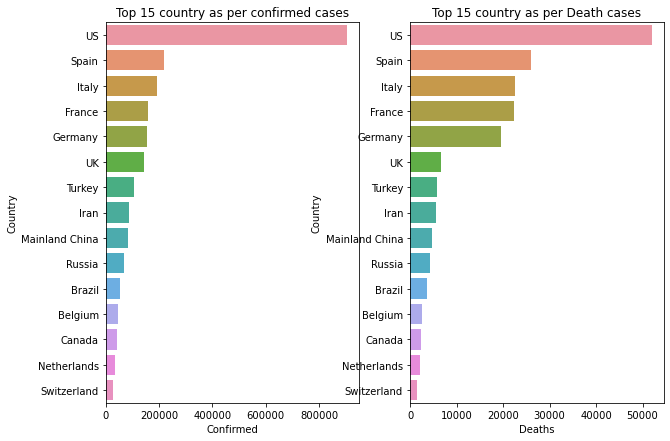

In [78]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,7))
top15_Confirmed=country_wise.sort_values(['Confirmed'],ascending=False).head(15)
top15_Deaths=country_wise.sort_values(['Deaths'],ascending=False).head(15)
sns.barplot(x=top15_Confirmed['Confirmed'],y=top15_Confirmed.index,ax=ax1)
sns.barplot(x=top15_Deaths['Deaths'],y=top15_Confirmed.index,ax=ax2)
ax1.set_title('Top 15 country as per confirmed cases')
ax2.set_title('Top 15 country as per Death cases')
plt.show()

## BarPlot

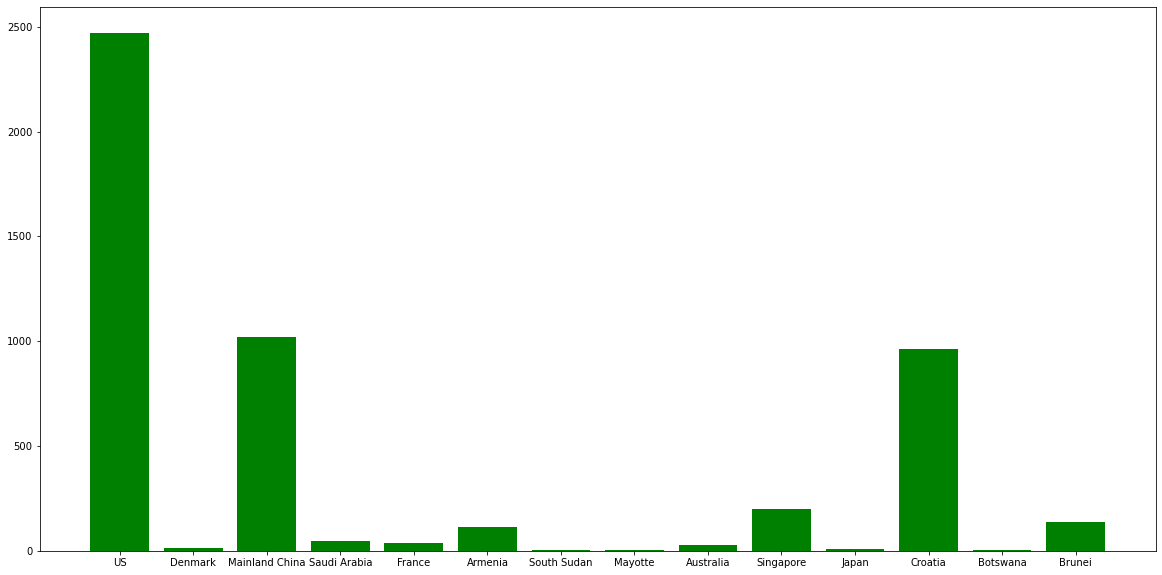

In [318]:
d1=d.sample(25)
plt.figure(figsize=(20,10))
plt.bar('Country','Confirmed', data=d1,color='green')
plt.show()

## CountPlot

190     1
804     1
120     1
231     1
33      1
2505    1
6       1
22      1
2839    1
4650    1
2108    1
5847    1
5       1
34      1
239     1
19      1
13      1
39      1
174     1
599     1
Name: Confirmed, dtype: int64


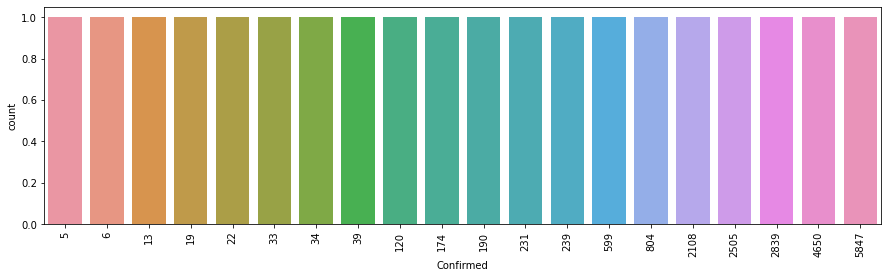

In [238]:
print(d1['Confirmed'].value_counts())
plt.figure(figsize=(15,4))
sns.countplot(x=d1['Confirmed'])
plt.xticks(rotation=90)
plt.show()

## lineplot

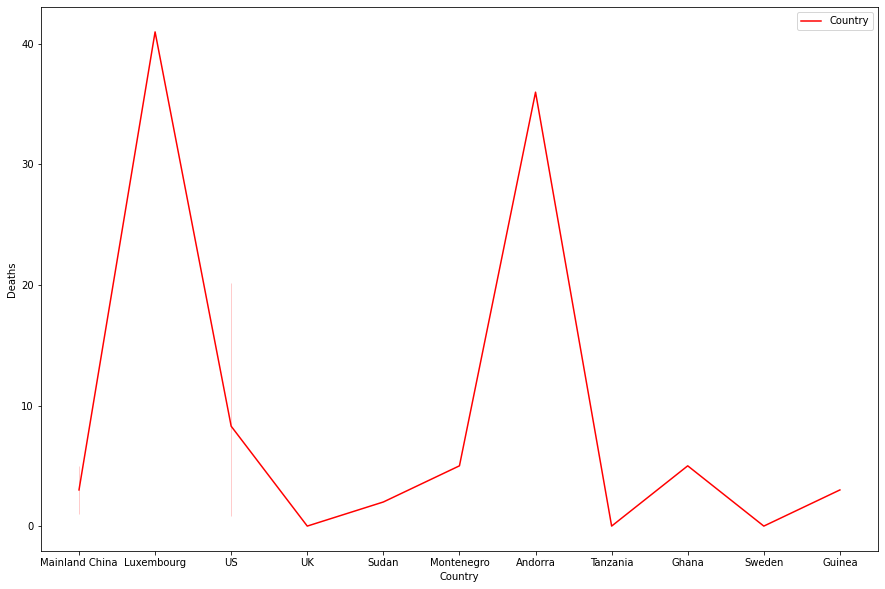

In [100]:
plt.figure(figsize=(15,10))
sns.lineplot('Country', 'Deaths', data = d.sample(20), color = 'r', label= 'Country')
plt.legend()
plt.show()


## pivot_table

In [101]:
d1=d.copy()
d1=d1.pivot_table('Recovered',columns='Country',aggfunc='max')
d1


Country,Azerbaijan,"('St. Martin',)",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
Recovered,0,0,188,394,1408,344,6,11,976,728,...,621,0,132,224,92,5,1,37,2,0


In [102]:
d1=d.copy()
d1=d1.pivot_table('Deaths',columns='Country',aggfunc='max')
d1


Country,Azerbaijan,"('St. Martin',)",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
Deaths,0,0,43,27,415,40,2,3,176,27,...,8,0,10,0,4,0,0,3,4,0


In [103]:
d1=d.copy()
d1=d1.pivot_table('Confirmed',columns='Country',aggfunc='max')
d1


Country,Azerbaijan,"('St. Martin',)",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
Confirmed,1,2,1351,678,3127,731,25,24,3607,1596,...,1804,1,318,270,484,6,1,84,29,25


## Heatmap

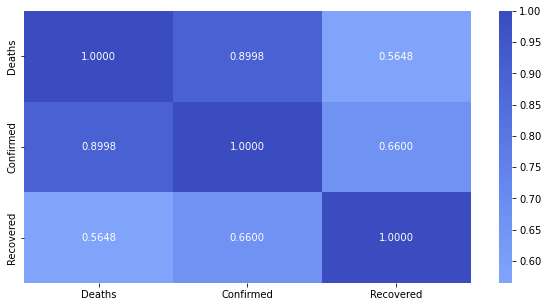

In [104]:
data=['Country','Deaths','Confirmed','Recovered']
plt.figure(figsize=(10,5))
sns.heatmap(d[data].corr(),annot=True,fmt='.4f',cmap='coolwarm_r',center=0)
plt.show()



## Relplot

<Figure size 1440x720 with 0 Axes>

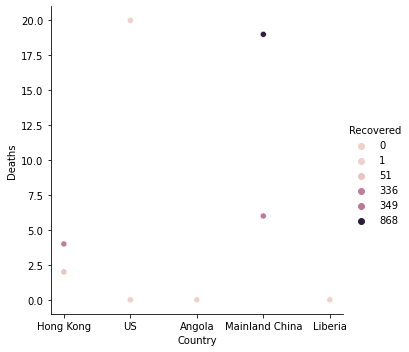

In [119]:
plt.figure(figsize=(20,10))
sns.relplot(x='Country',y='Deaths',hue='Recovered',data=d.sample(10))
plt.show()

## barplot with grid

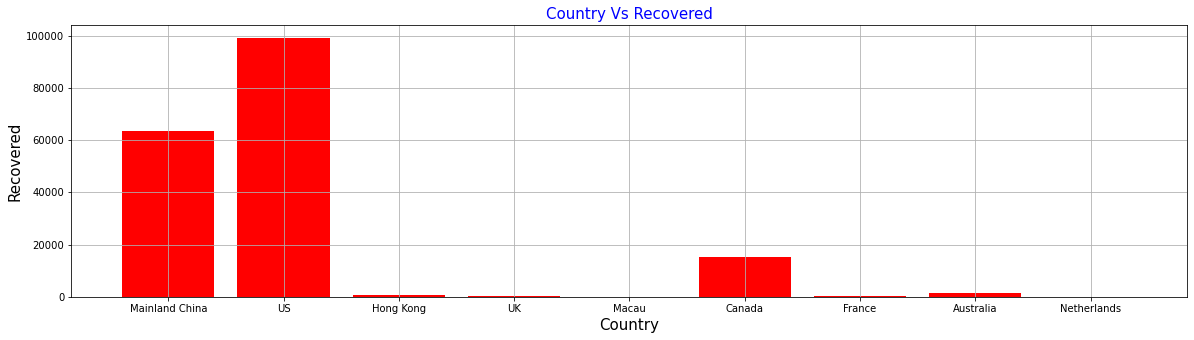

In [250]:
d2=d.tail(100)
plt.figure(figsize=(20,5))
plt.bar(d2['Country'],d2['Recovered'],color="red")
plt.title('Country Vs Recovered',fontsize=15,color='blue')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Recovered',fontsize=15)
plt.grid(True)
plt.show()

## Countplot

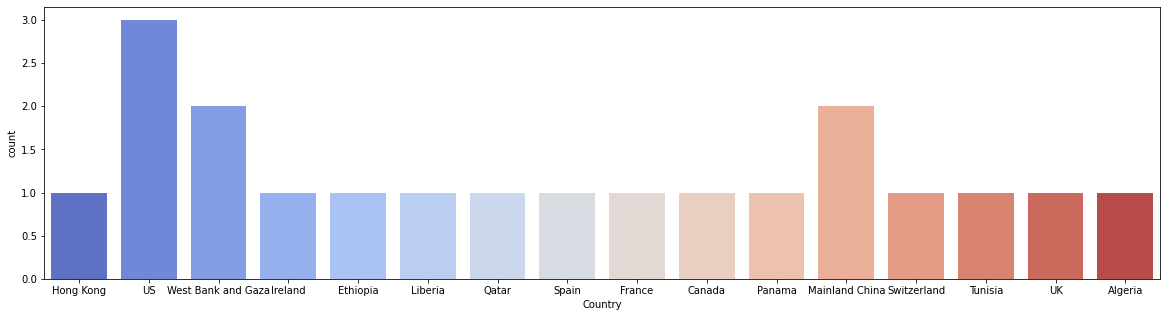

In [251]:
plt.figure(figsize=(20,5))
sns.countplot(x='Country',data=d.sample(20),palette='coolwarm')
plt.show()

<AxesSubplot:xlabel='Country', ylabel='count'>

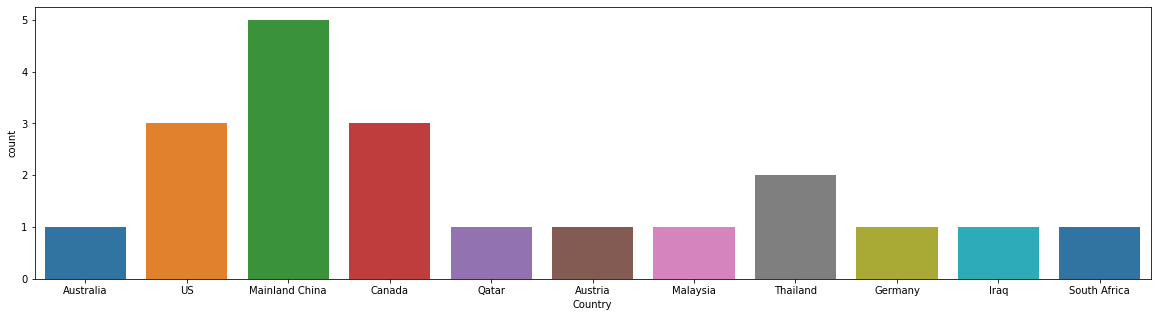

In [255]:
plt.figure(figsize=(20,5))
sns.countplot(x='Country',data=d.sample(20),palette='tab10')


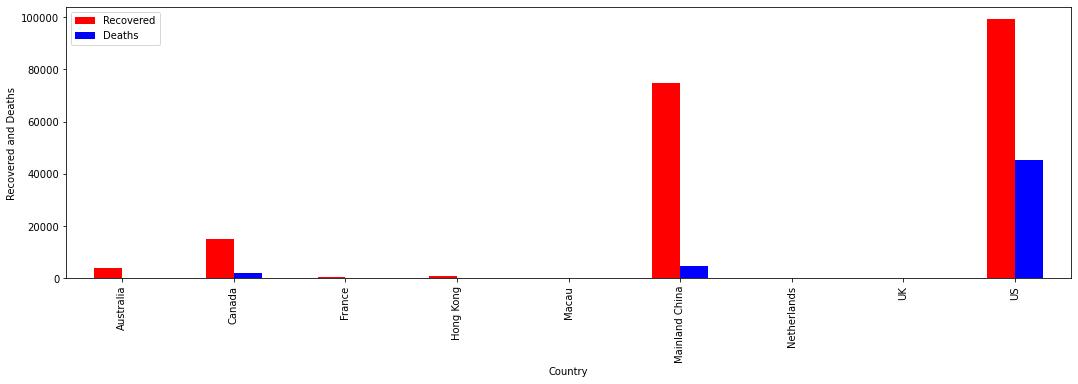

In [260]:
d3=d.tail(100)
d3.groupby('Country')[['Recovered','Deaths']].sum().plot.bar(color=['red','blue'],figsize=(18,5))
plt.ylabel('Recovered and Deaths')
plt.show()

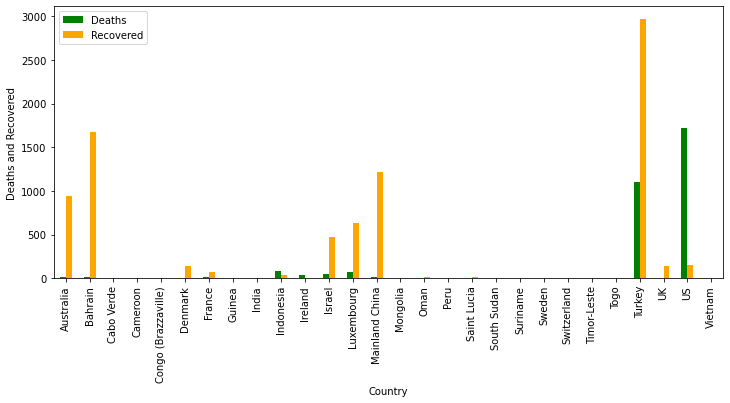

In [281]:
d4=d.sample(50)
d4.groupby('Country')[['Deaths','Recovered']].sum().plot.bar(color=['green','orange'],figsize=(12,5))
plt.ylabel('Deaths and Recovered')
plt.show()

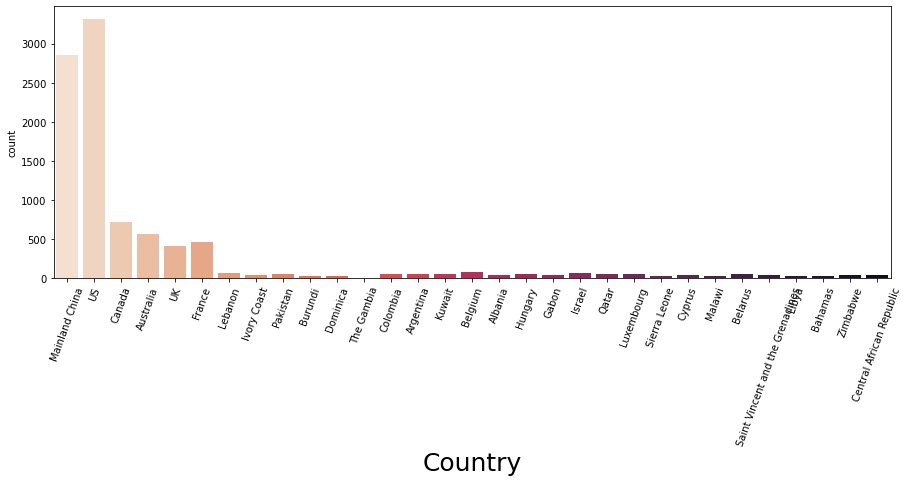

In [209]:
plt.figure(figsize=(15,5))
sns.countplot(x="Country",data=d,palette='rocket_r',order=d3['Country'].value_counts().index)
plt.xlabel('Country',fontsize=25)
plt.xticks(rotation=70)
plt.show()

## Datatype

In [193]:
d.dtypes

ObservationDate    datetime64[ns]
Country                    object
Last Update                object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
dtype: object

## Histogram

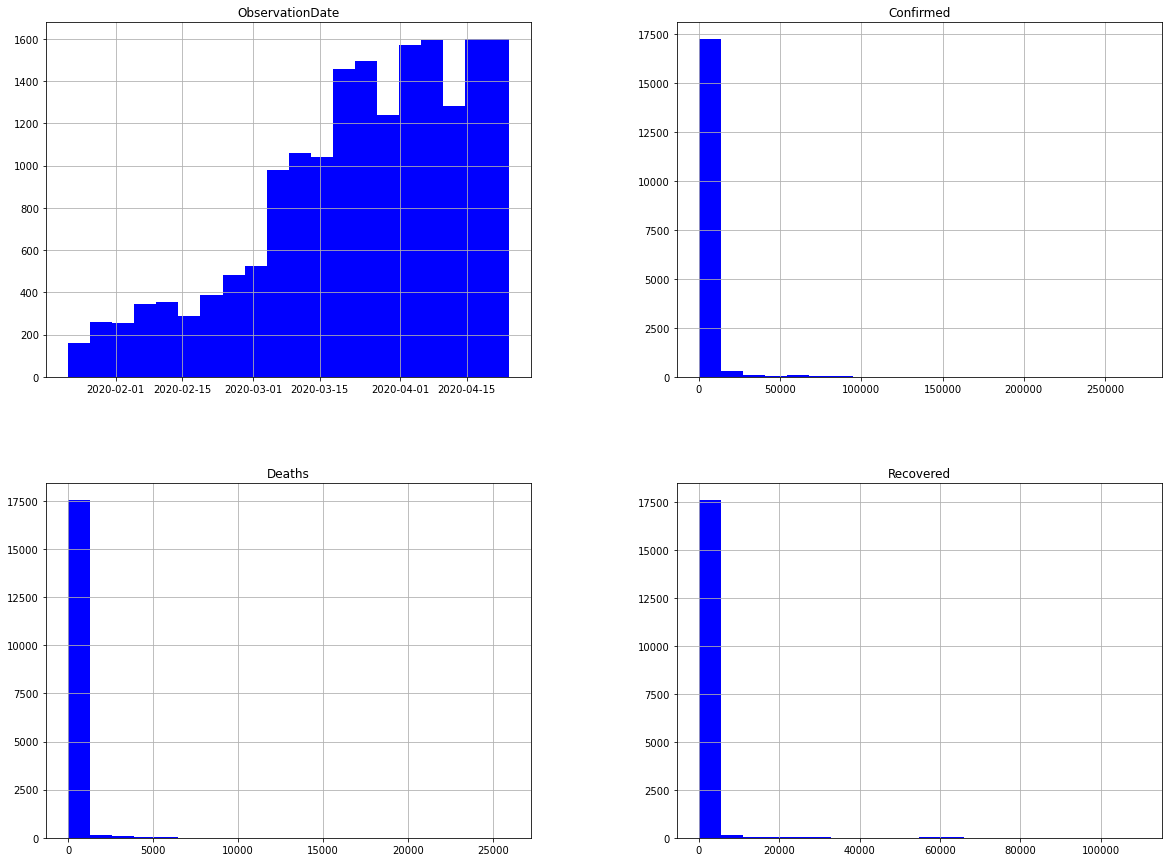

In [196]:
d.hist(bins=20 ,figsize=(20,15),color='blue')
plt.show()

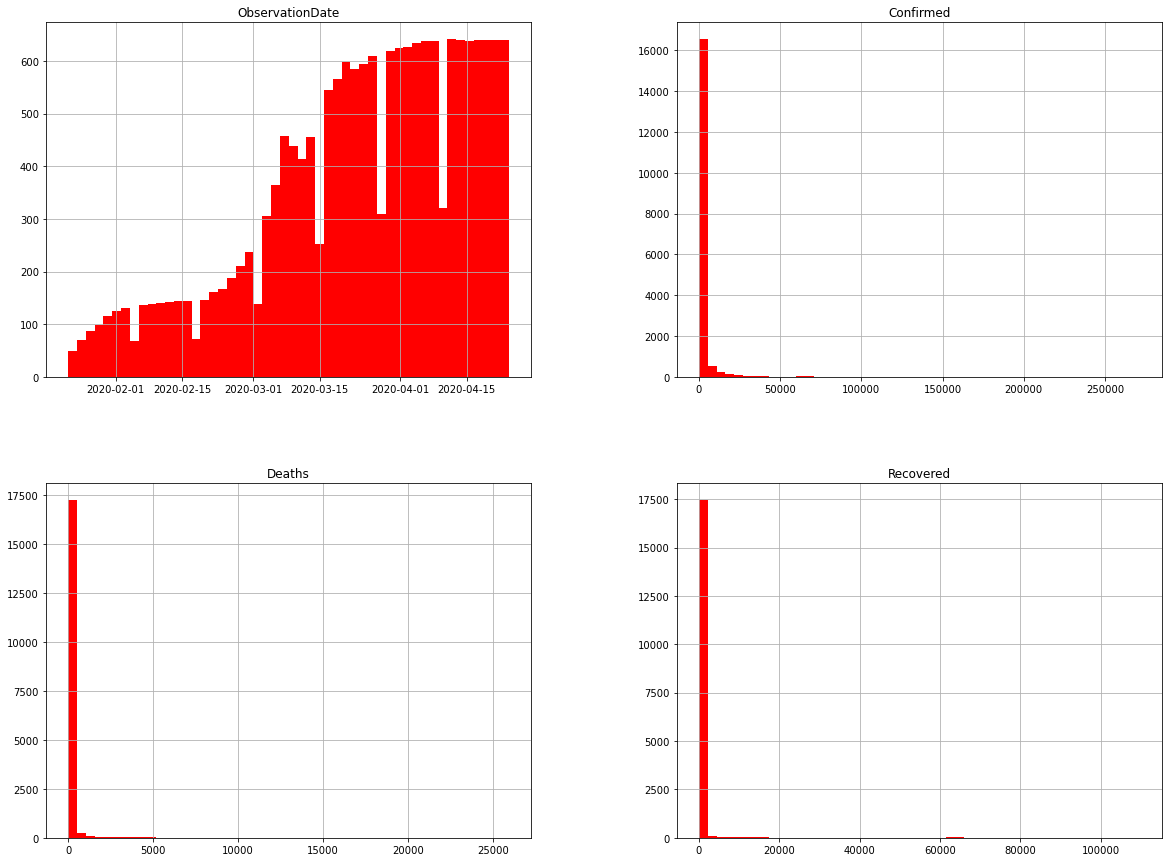

In [197]:
d.hist(bins=50 ,figsize=(20,15),color='red')
plt.show()

## pairplot

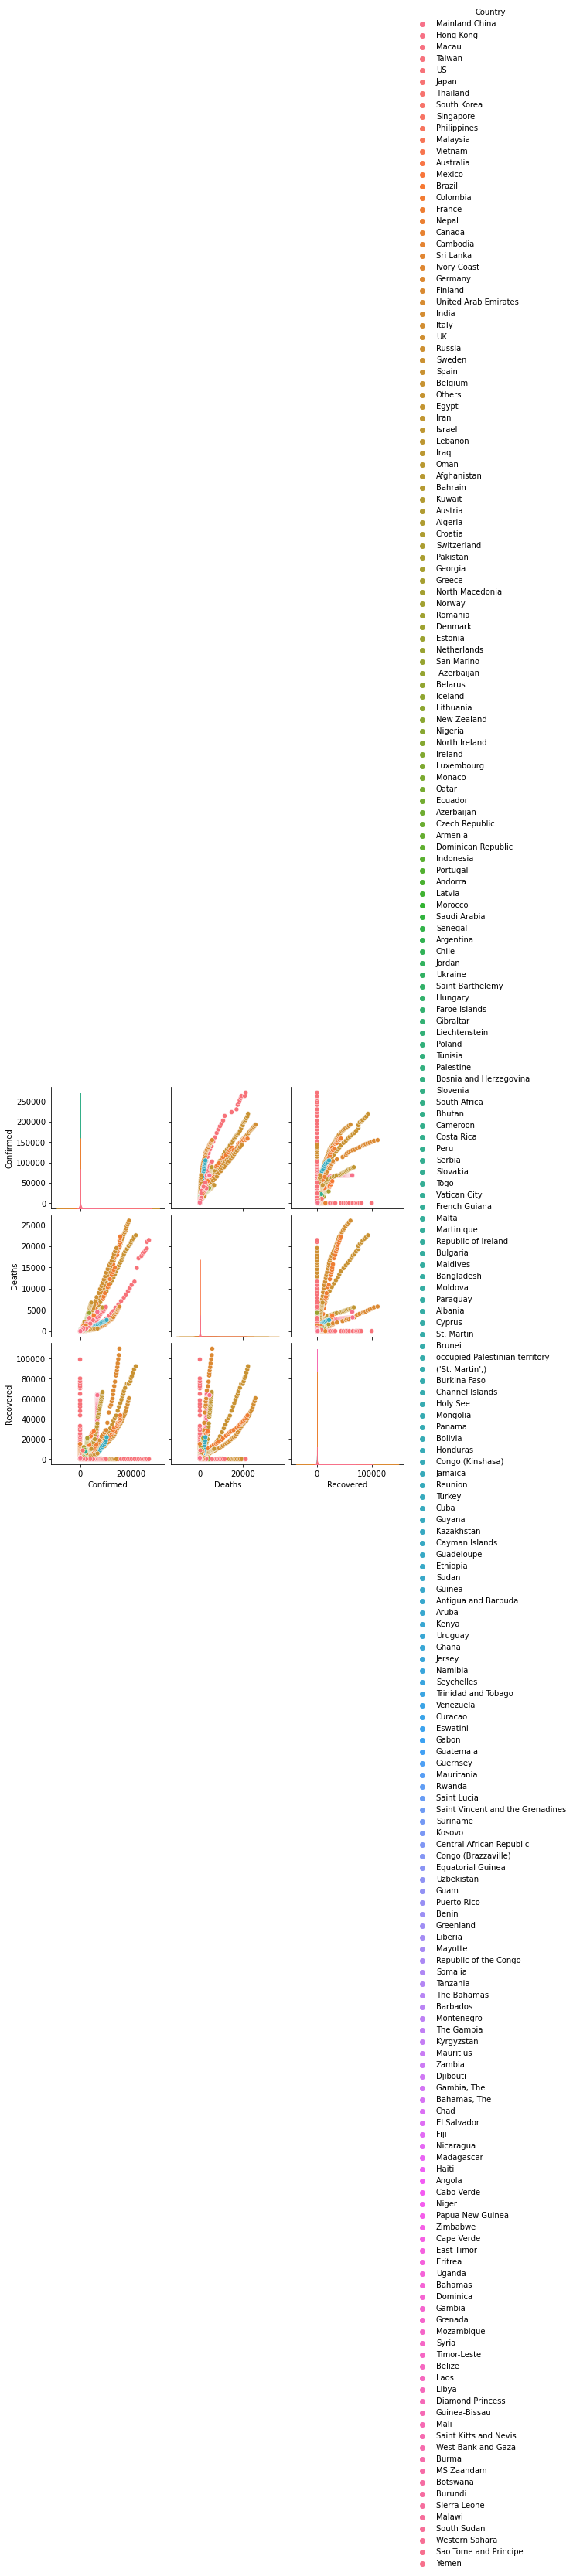

In [198]:
sns.pairplot(d,hue='Country')
plt.show()

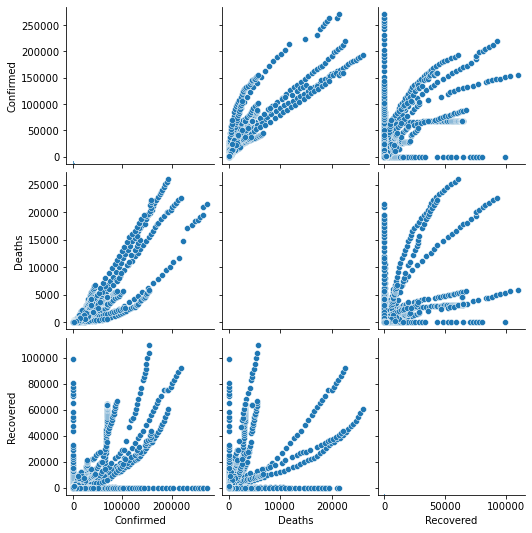

In [199]:
sns.pairplot(d)
plt.show()

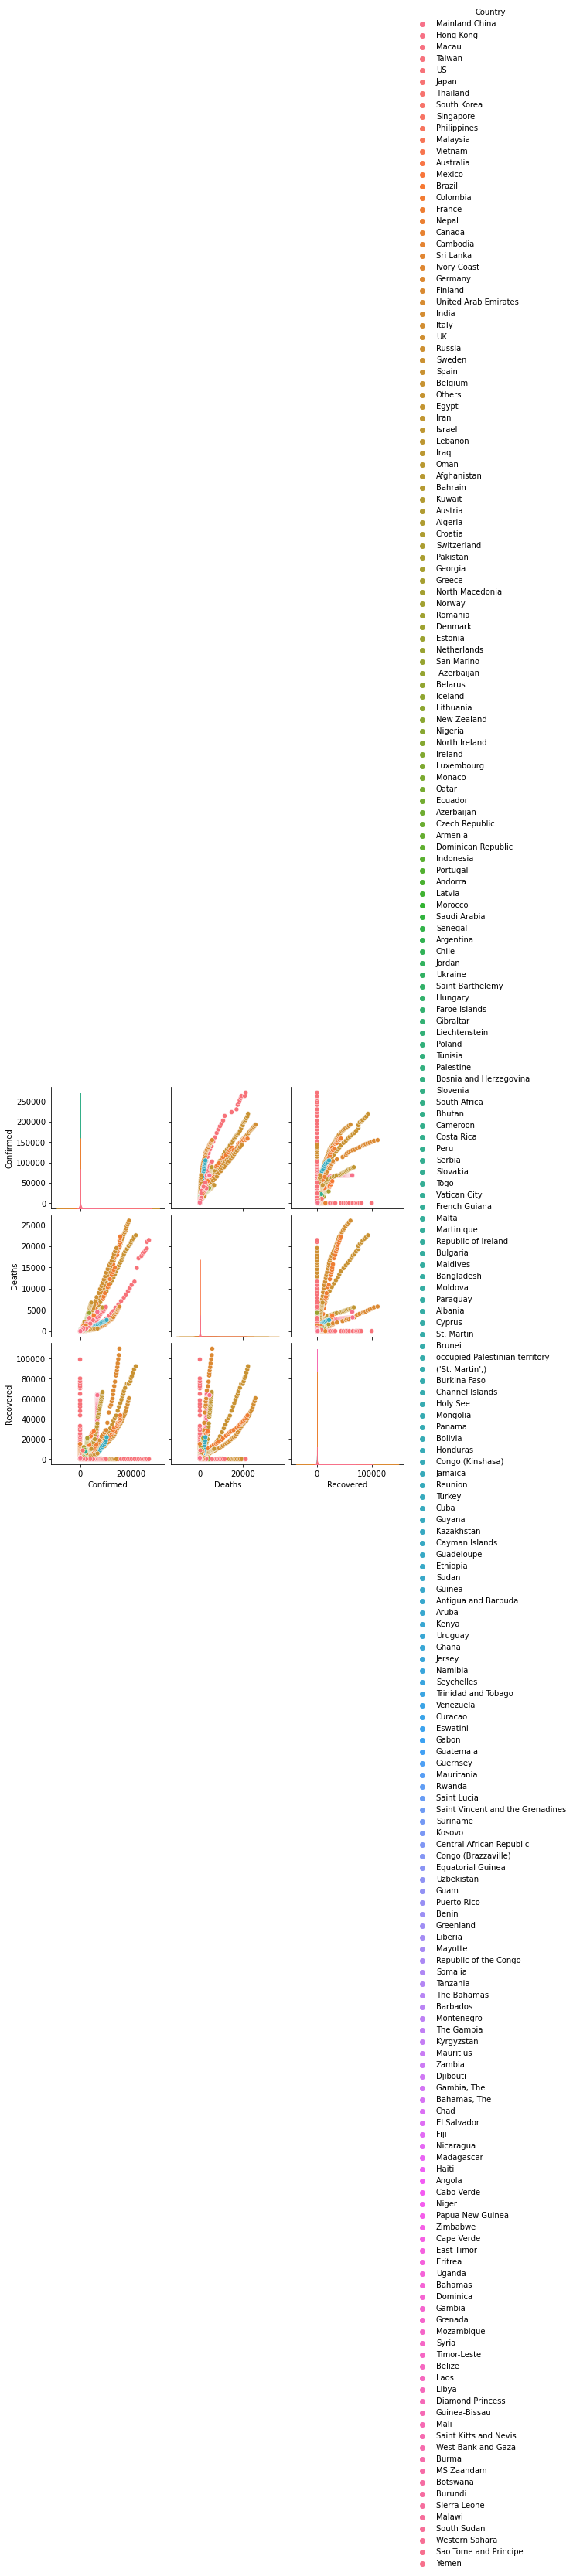

In [200]:
sns.pairplot(d,hue='Country')
plt.show()

In this covid data analysis contain all the cases recovered,total deaths,total cases confirmed shown by country.